In [1]:
# load the libraries
# basic libraries
import numpy as np
import pandas as pd
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# default settings for plotting
plt.rcParams["figure.figsize"] = (15, 10) # adjust figure size
plt.rcParams["figure.dpi"] = 125 # set the default dots per inch (DPI) for figures to 125
plt.rcParams["font.size"] = 14 # set font size
# set the default font family to sans-serif and specifies 'DejaVu Sans' as the default sans-serif font.
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot') # apply 'ggplot' style to the plots, which mimics the style of plots created by the ggplot2 package in R.
sns.set_style("whitegrid", {'axes.grid': False}) # set the Seaborn style to "whitegrid" but turns off the grid lines for the axes.
# Sets the default colormap for images to 'viridis'
plt.rcParams['image.cmap'] = 'viridis' # grayscale looks better

* **OffsetImage** is used to display an image at a specific location in a plot and embed images as data points or annotations.
* **AnnotationBbox** is a container that annotates a specific location in the plot with an OffsetBox, such as an OffsetImage. It can fix images, text, or other elements to a specified coordinate.

In [2]:
from pathlib import Path # The Path class from the pathlib module provides an object-oriented approach to handling file system paths.

from skimage.io import imread as imread # read an image from a file into a NumPy array.
from skimage.util import montage as montage2d # create a 2D montage (a grid) of images.
from skimage.color import label2rgb # overlay colored labels on an image or converts labeled regions to an RGB image for better visualization.
from PIL import Image # open, manipulate, and save image files.

import os
# Get the directory of the current file and set as path
path = os.getcwd()

In [3]:
# read the json file of image subset
image_overview_df = pd.read_json(path + '/feature_food/image_subset.json')
print(image_overview_df.shape[0], 'image, recipe pairs loaded')
image_overview_df.sample(3)

9653 image, recipe pairs loaded


id      image_path  \
4472  81ae5c92ec  77eab3562e.jpg   
4350  514620f5e4  74a31c137e.jpg   
139   30e2def948  044a7ee9f9.jpg   

                                                 images  \
4472  [{'id': '77eab3562e.jpg', 'url': 'http://img.s...   
4350  [{'id': '74a31c137e.jpg', 'url': 'http://img.s...   
139   [{'id': '005645da6f.jpg', 'url': 'http://image...   

                                            ingredients  \
4472  [{'text': '1 tablespoon cornstarch'}, {'text':...   
4350  [{'text': '1 cup gruyere cheese, grated'}, {'t...   
139   [{'text': '1/2 cup butter, softened'}, {'text'...   

                                           instructions partition  \
4472                    [{'text': 'mix all together.'}]       val   
4350  [{'text': 'Heat oven to 425F Coat a 9-inch pie...       val   
139   [{'text': 'In a large bowl, cream together the...       val   

                               title  \
4472             Mexican Spice Blend   
4350  Potato, Tomato and Cheese Tart   
139                Buttercream Icing   

                                       ingredients_list  \
4472  [1 tablespoon cornstarch, 2 teaspoons chili po...   
4350  [1 cup gruyere cheese, grated, 1 cup reduced-f...   
139   [1/2 cup butter, softened, 1/2 cup shortening,...   

                                 clean_ingredients_list  \
4472  [cornstarch, chili powder, salt, paprika, suga...   
4350  [gruyere cheese, reduced - fat cheddar cheese,...   
139   [butter, shortening, vanilla extract, confecti...   

                                        top_ingredients  
4472  [cornstarch, chili powder, salt, paprika, suga...  
4350  [extra virgin olive oil, garlic, salt, ground ...  
139   [butter, shortening, vanilla extract, confecti...

JSON file containing metadata for a collection of images

In [4]:
# exact id, path, title and top ingredients as the targeted image feature infomation
simple_images_df = image_overview_df[['id','image_path','title','top_ingredients']]
simple_images_df.head(3)

id      image_path                                 title  \
0  712a33dc5a  000069bf1c.jpg                      Key West Fillets   
1  92b599175b  0012bb6758.jpg                       Nutella Granola   
2  aa4feaf24f  00139141ff.jpg  Cream Cheese and Pepper Jelly Spread   

                                  top_ingredients  
0  [butter, parmesan cheese, salt, garlic powder]  
1                       [brown sugar, canola oil]  
2                                  [cream cheese]

* zip(m_axs.flatten(), simple_images_df.iterrows()) combines the flattened axes and DataFrame rows into pairs.
* os.path.join() constructs the full path to the image file by joining the base directory with the relative path stored in the DataFrame.

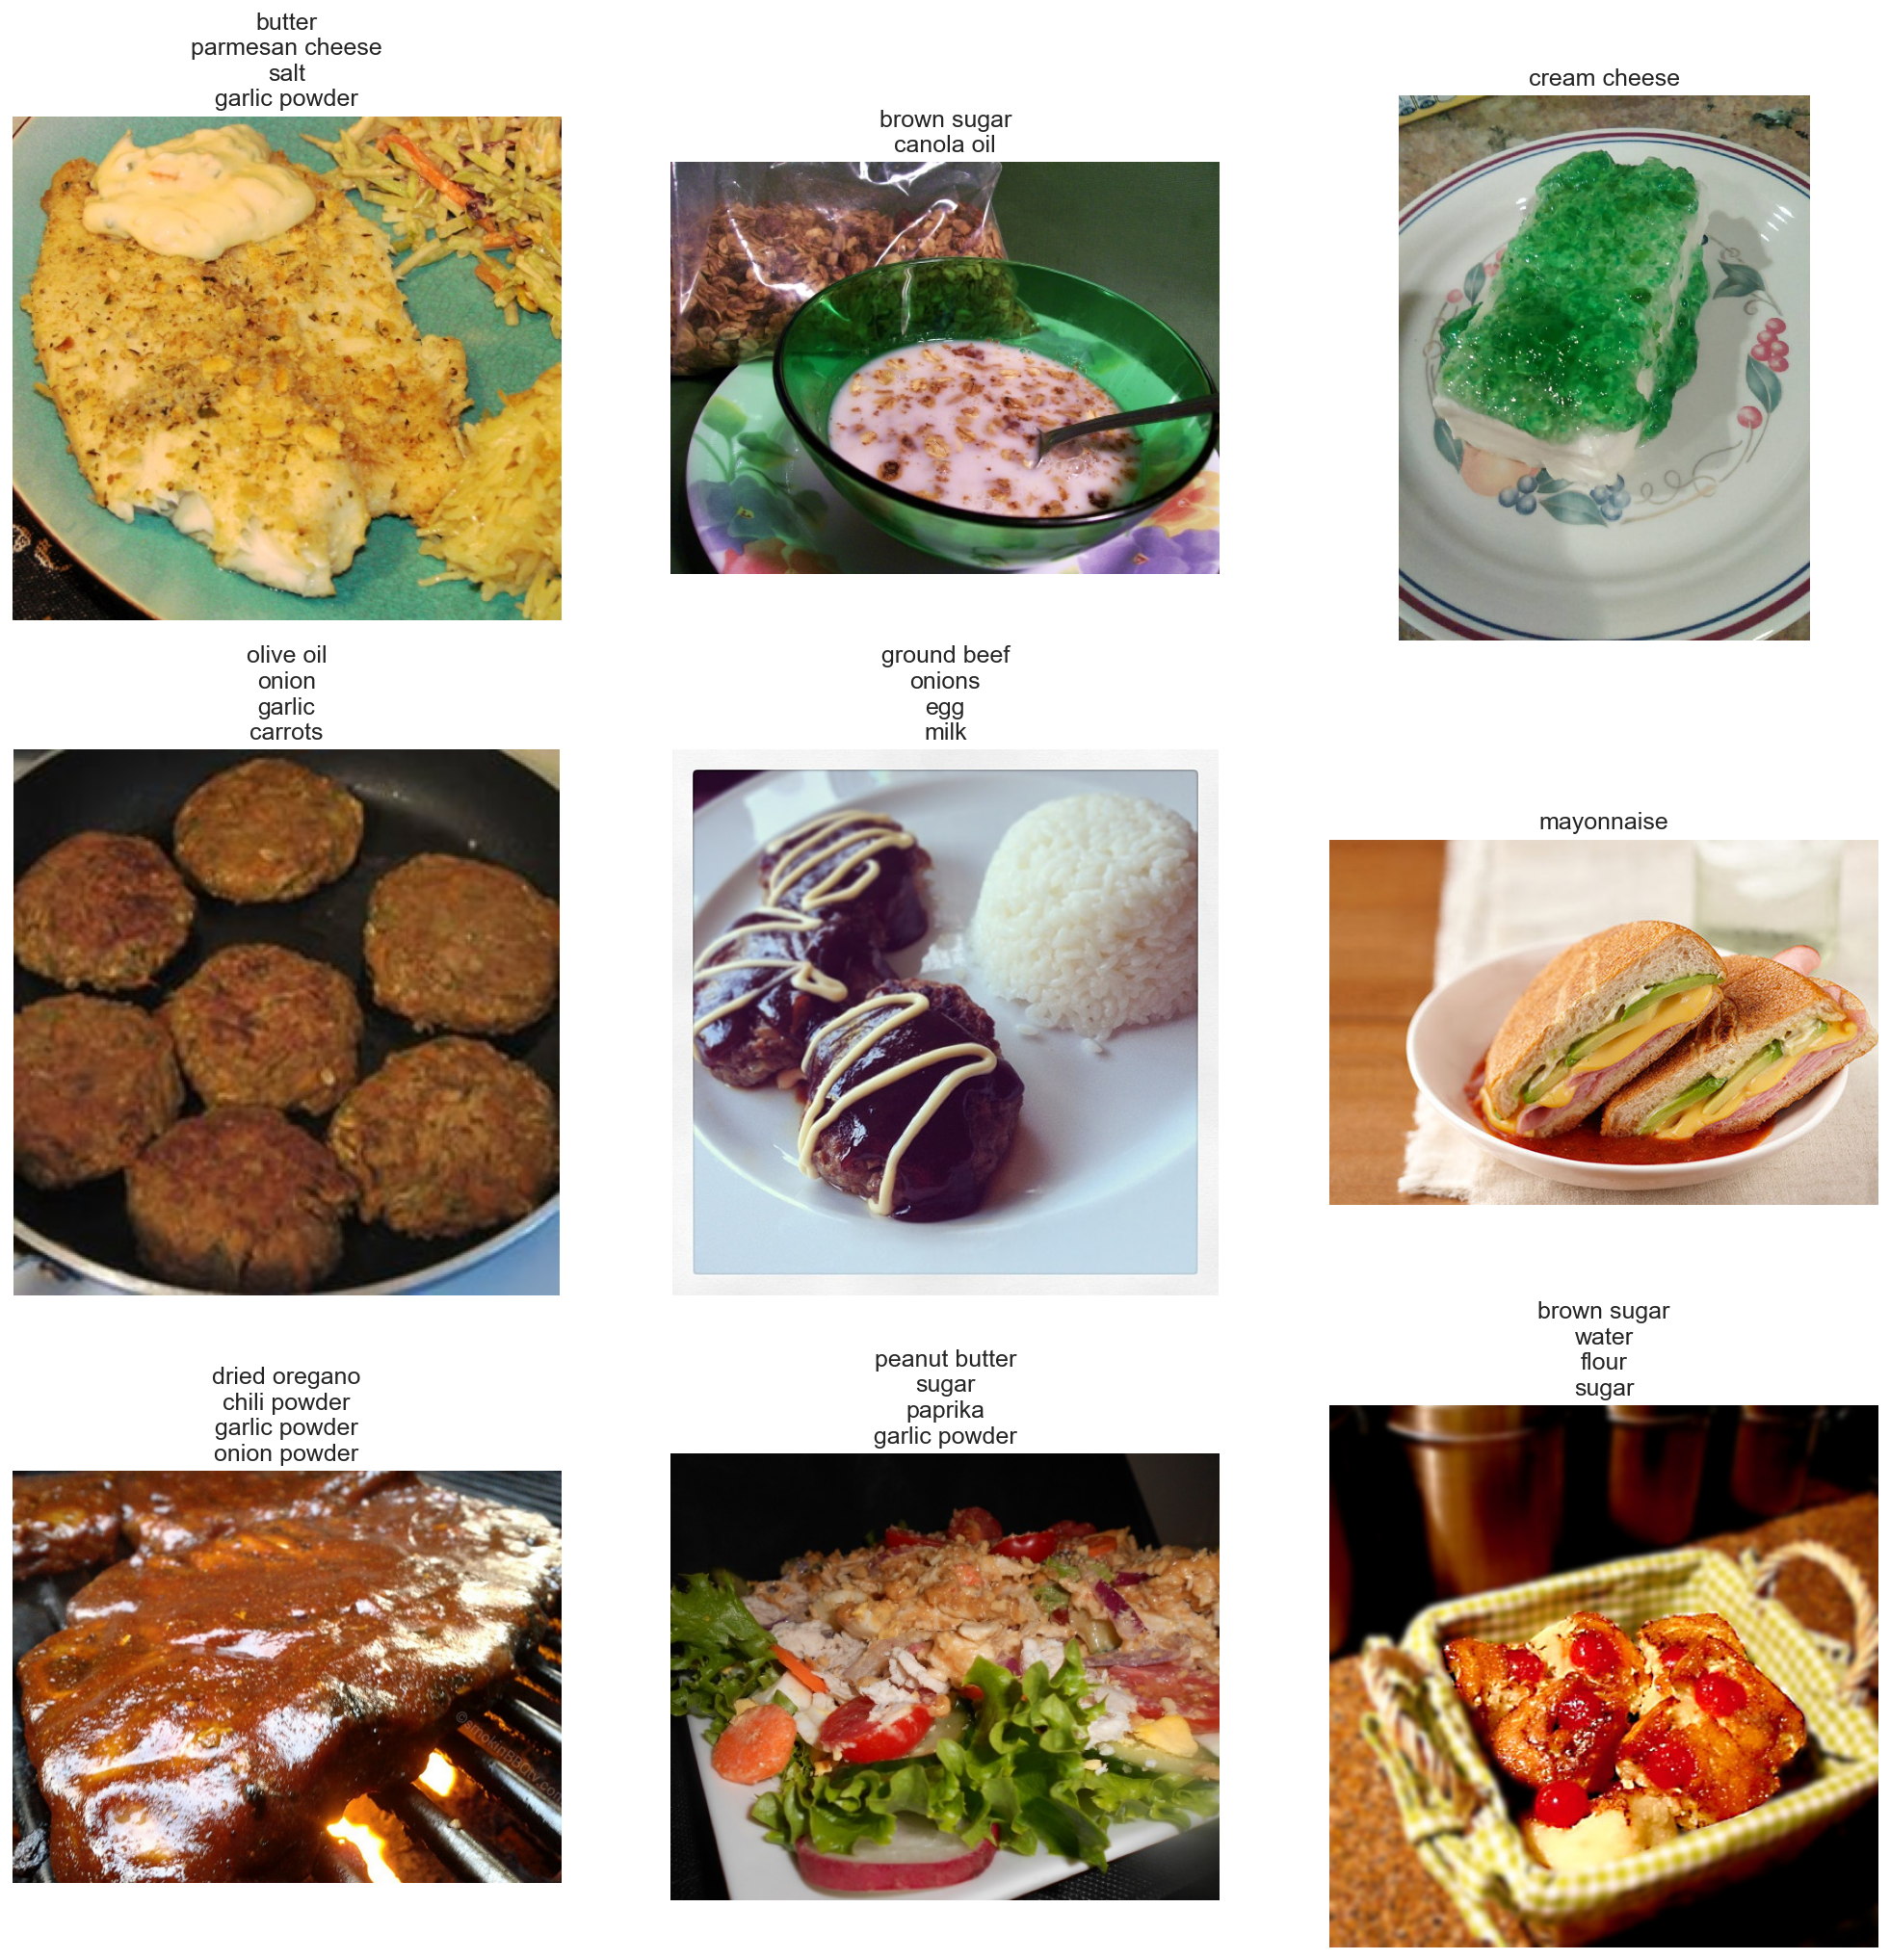

In [5]:
# set the format to draw subplot
fig, m_axs = plt.subplots(3, 3, figsize=(20, 20)) # draw 9 pics in 3*3 grid
# Iteration and Flattening of Axes
for c_ax, (_, c_row) in zip(m_axs.flatten(), simple_images_df.iterrows()): # m_axs.flatten(): Flattens a 2D array of Matplotlib axes (m_axs) into a 1D array. 
    image_path = os.path.join(path + '/feature_food/subset', c_row['image_path'])
    c_ax.imshow(imread(image_path)) # use imread to read image path and show in the sub axis
    c_ax.set_title('\n'.join(c_row['top_ingredients'][:4])) # set title for every sub plot
    c_ax.axis('off') # turn off the axis lines and labels for the current subplot

In [6]:
# glance at the data structure using 1 example
test_row = simple_images_df.iloc[1]
print(test_row)

id                                92b599175b
image_path                    0012bb6758.jpg
title                        Nutella Granola
top_ingredients    [brown sugar, canola oil]
Name: 1, dtype: object


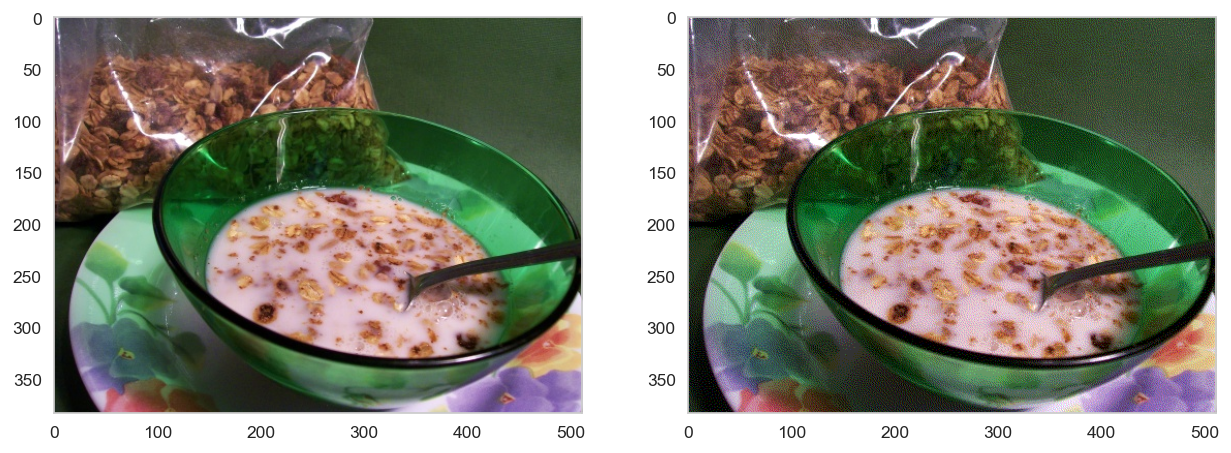

In [14]:
# set image path as the example image path
image_path = path + '/feature_food/subset/' + test_row['image_path']
test_image = Image.open(image_path) # open the image file
web_image = test_image.convert('P', palette='WEB', dither=None) # convert the image to a web palette image with 216 colors

# set plot format
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(test_image)
ax2.imshow(web_image)


In [15]:
# Prints the number of different RGB color combinations in the original image and processed image
print('Unique colors before', len(set([tuple(rgb) for rgb in np.array(test_image).reshape((-1, 3))])))
print('Unique colors after', len(set([tuple(rgb) for rgb in np.array(web_image).reshape((-1, 3))])))

Unique colors before 97663
Unique colors after 6756


Converting the image to p mode reduces the unique colors (color loss) but keeps the main feature, this helps to simplify the image features.

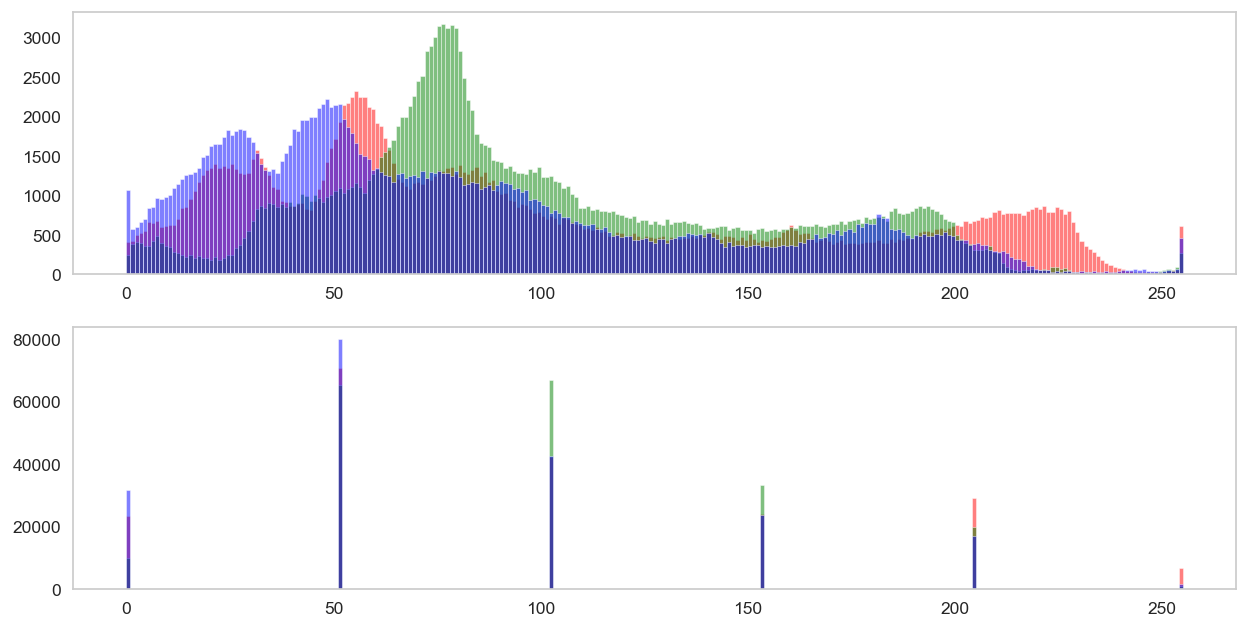

In [17]:
# compare the color distribution before and after the conversion using RGB format
few_color_image = web_image.convert('RGB') # convert the image to RGB format to extract the three color channels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
for c_channel, c_name in enumerate(['red', 'green', 'blue']):
    ax1.hist(np.array(test_image)[:, :, c_channel].ravel(), 
             color=c_name[0], 
             label=c_name, 
             bins=np.arange(256), 
             alpha=0.5)
    ax2.hist(np.array(few_color_image)[:, :, c_channel].ravel(), 
             color=c_name[0], 
             label=c_name, 
             bins=np.arange(256), 
             alpha=0.5)

After conversion, the distribution of red, green and blue becomes discrete. It shows that the colors are more easy to be distinguished.

Text(0, 0.5, 'Pixel Count')

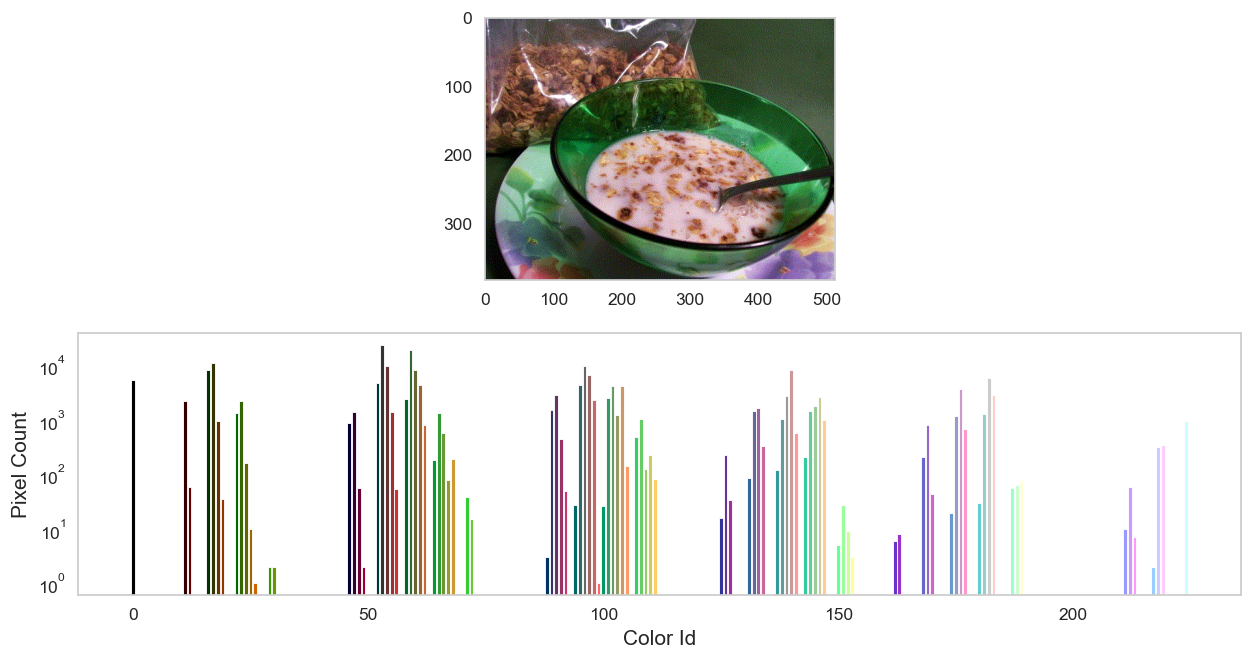

In [19]:
# exact color palette
idx_to_color = np.array(web_image.getpalette()).reshape((-1, 3))/255.0
# set plot format
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
ax1.imshow(web_image)
# set the color bar
counts, bins = np.histogram(web_image, bins=np.arange(226))
for i in range(counts.shape[0]):
    ax2.bar(bins[i], counts[i], color=idx_to_color[i])
ax2.set_yscale('log')
ax2.set_xlabel('Color Id')
ax2.set_ylabel('Pixel Count')

In each image, we extract the proportion of each color feature in the overall proportion.

* web_image.getpalette() retrieves the color palette (a list of RGB tuples) of the indexed-color image web_image. 
* .reshape((-1, 3)) reshapes the array into a 2D array with 3 columns. Each row represents an RGB color.

In [22]:
# set the color count feature by combining the above steps
def color_count_feature(in_path):
    image_path = path +'/feature_food/subset/' + in_path
    raw_image = Image.open(image_path)
    web_image = raw_image.convert('P', palette='WEB', dither=None)
    counts, bins = np.histogram(np.array(web_image).ravel(), bins=np.arange(256))
    return counts*1.0/np.prod(web_image.size) # normalize output

## observe the color distribution of data set
We take 100 random samples and store them in image_subset_df to see the frequency distribution of different colors in the raw data. The frequency of different colors is calculated by our color_count_feature function stored in the color_features column. Finally, the color features of all the image samples are stacked together to form a 2D array combined_features.We observe the color distribution of the original data in this combined_features.

In [23]:
# test the function using 100 samples
%%time
image_subset_df = simple_images_df.sample(100).copy()
image_subset_df['color_features'] = image_subset_df['image_path'].map(color_count_feature)
image_subset_df.sample(3)

id      image_path                                    title  \
7315  dbcfde3b11  c17290835d.jpg         Cinnamon Swirl Bundt Coffee Cake   
9173  eeeb2d4059  f3fff2d922.jpg  Roll It Out: Handmade Lemon Pappardelle   
6531  45bb2166ec  ad0ab32fc2.jpg             Mimi's Smoked Salmon Chowder   

                                        top_ingredients  \
7315  [butter, white sugar, eggs, vanilla extract, s...   
9173                   [flour, eggs, fresh lemon juice]   
6531  [butter, olive oil, onions, garlic cloves, cel...   

                                         color_features  
7315  [0.0037994384765625, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
9173  [0.00016251996368350885, 0.0, 0.0, 0.0, 0.0, 0...  
6531  [0.01531982421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0....

C:\Users\Rachel\AppData\Local\Temp\ipykernel_8244\3290177653.py:13: RuntimeWarning: invalid value encountered in divide
  ax2.imshow(combined_features/color_wise_average, vmin=0.05, vmax=20)


Text(0, 0.5, 'Frequency')

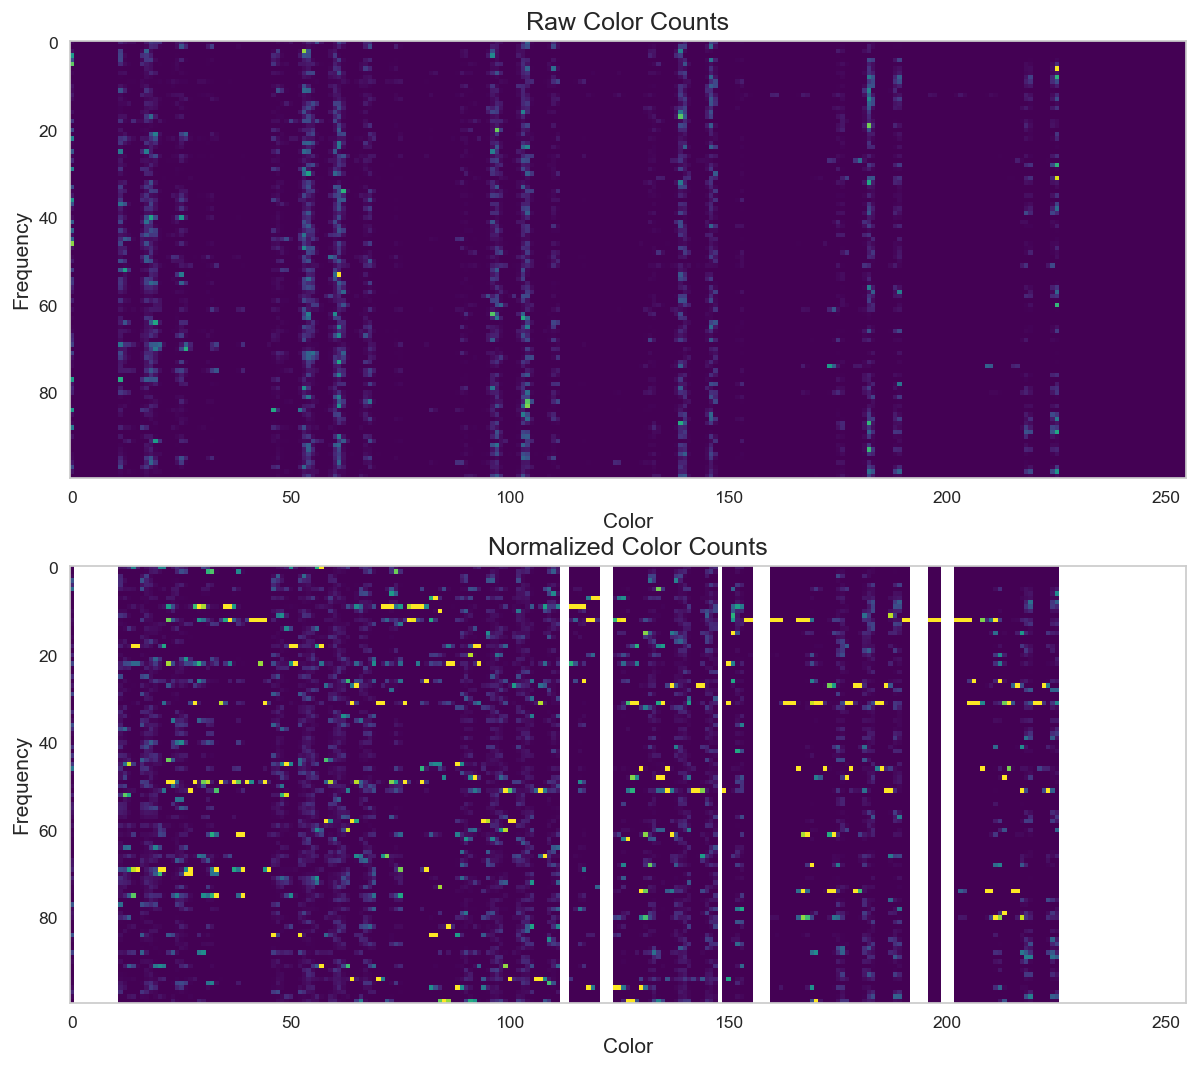

In [24]:
# set the plot format
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
# stack the color features
combined_features = np.stack(image_subset_df['color_features'].values, 0)
# plot the raw color counts
ax1.imshow(combined_features)
ax1.set_title('Raw Color Counts')
ax1.set_xlabel('Color')
ax1.set_ylabel('Frequency')

# plot the normalized color counts
color_wise_average = np.tile(np.mean(combined_features, 0, keepdims=True), (combined_features.shape[0], 1))
ax2.imshow(combined_features/color_wise_average, vmin=0.05, vmax=20)
ax2.set_title('Normalized Color Counts')
ax2.set_xlabel('Color')
ax2.set_ylabel('Frequency')

- The first figure visualizes the distribution of the original color features and helps to understand the basic composition of the data in terms of the color dimension.
- The second figure is using normalization to allow relative differences in color distribution to be highlighted more clearly. It eliminates the effect of absolute quantities and makes the proportionality between different colors more obvious.

In [29]:
print(combined_features) # combined features are actually to stack the color features for each image as an array
image_subset_df.head(3)

[[7.87353516e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.10351562e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.40584310e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.94427490e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.58886795e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.39363607e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


id      image_path                                    title  \
8797  2e24c946a5  e9acddc372.jpg  Lemon Orzo With Mushrooms and Pine Nuts   
1446  68112d3e6f  2790455860.jpg                   Honey Baked Chicken II   
7795  5434309c89  cde9abcb24.jpg                             Pumpkin Cake   

                                        top_ingredients  \
8797  [lemon, extra virgin olive oil, extra virgin o...   
1446                              [butter, honey, salt]   
7795  [eggs, all - purpose flour, baking soda, salt,...   

                                         color_features  
8797  [0.00787353515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  
1446  [6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  
7795  [0.014058430989583334, 0.0, 0.0, 0.0, 0.0, 0.0...

In [24]:
from sklearn.decomposition import PCA
# reduce dimensionality to 2D using PCA for better visualization
xy_pca = PCA(n_components=2)
xy_coords = xy_pca.fit_transform(combined_features)
image_subset_df['x'] = xy_coords[:, 0]
image_subset_df['y'] = xy_coords[:, 1]

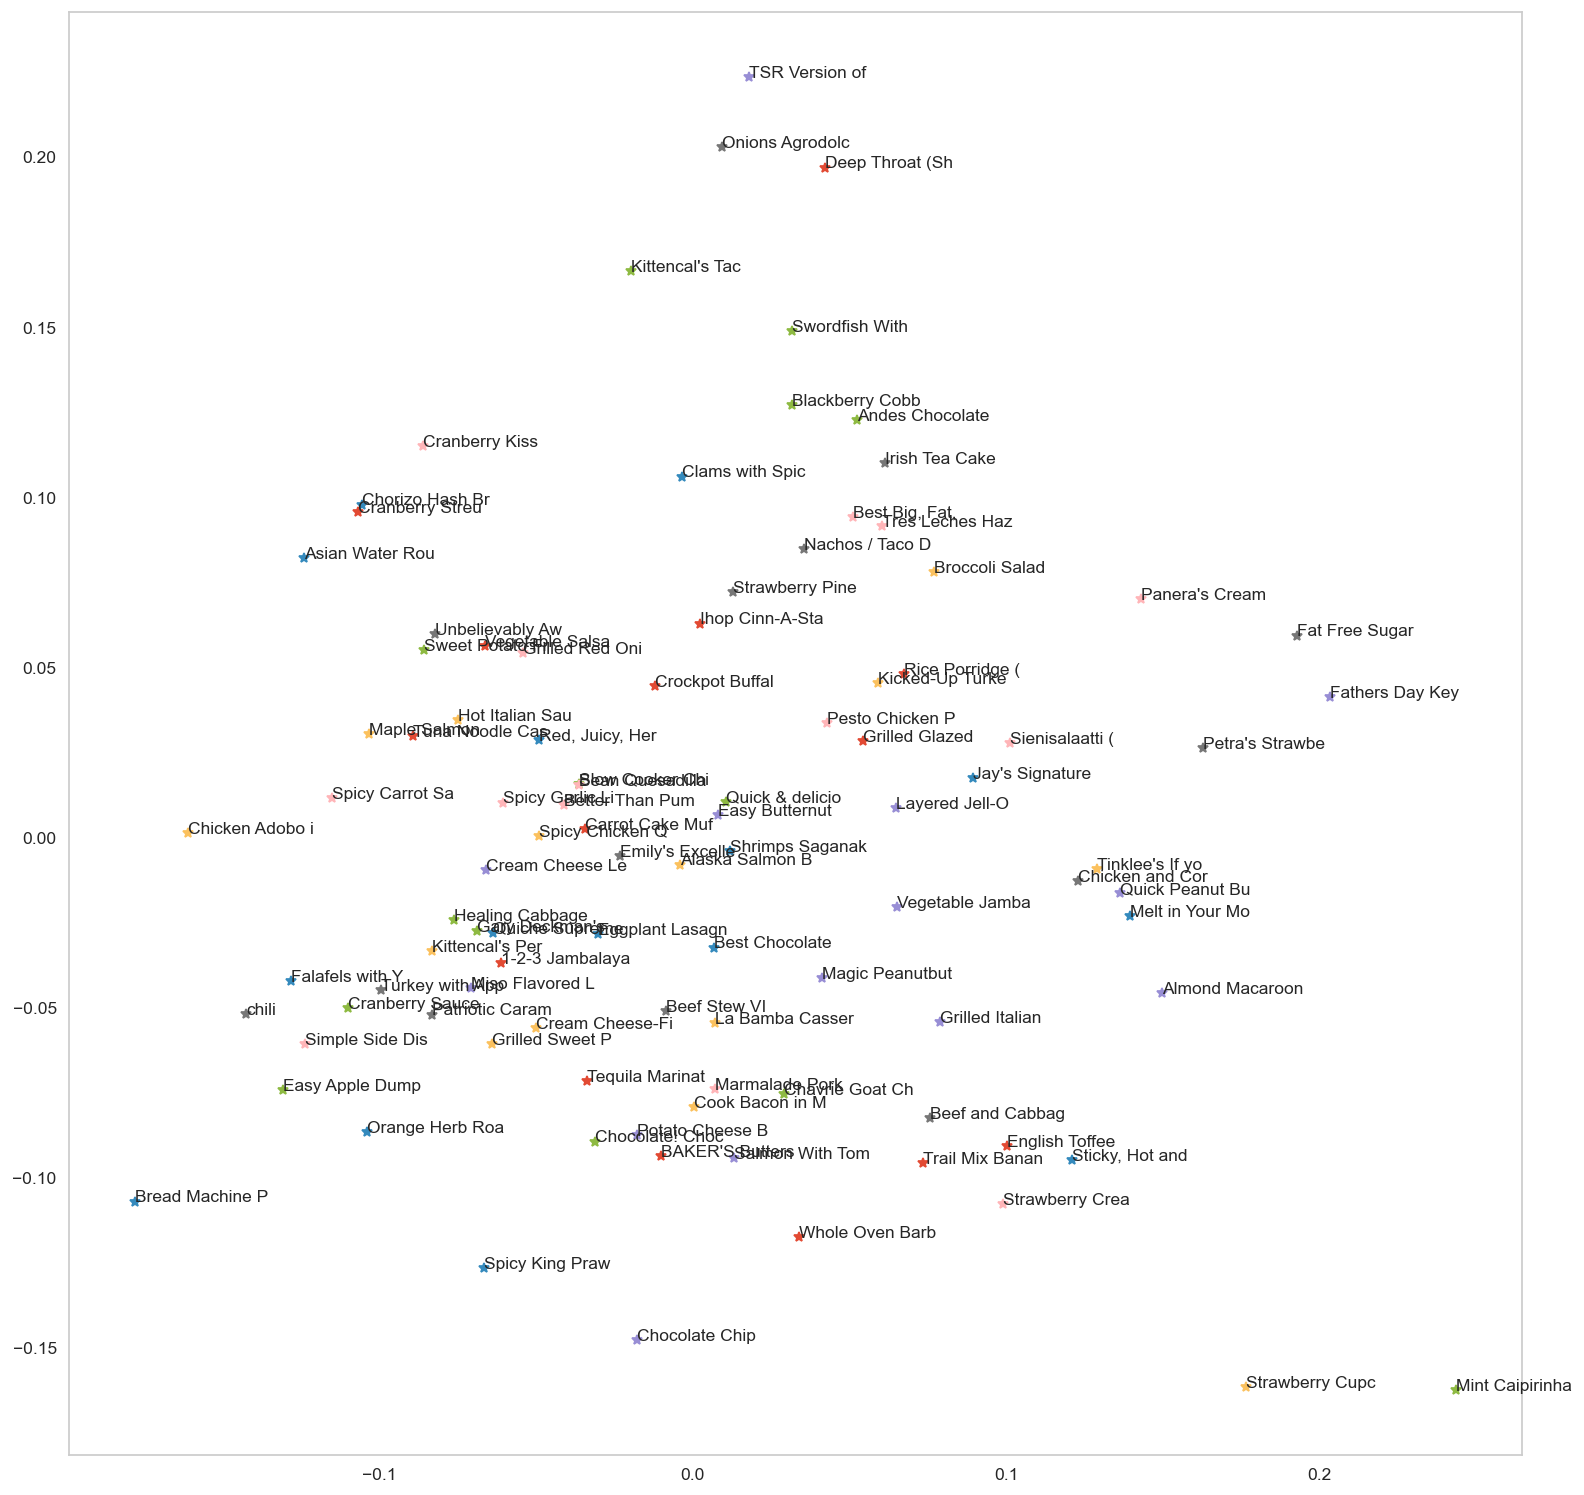

In [25]:
# plot the 2D PCA representation for the sample images
fig, ax1 = plt.subplots(1,1, figsize=(15, 15))
for _, c_row in image_subset_df.iterrows():
    ax1.plot(c_row['x'], c_row['y'], '*')
    ax1.text(s=c_row['title'][:15], x=c_row['x'], y=c_row['y'])

We set the two principal components as the x and y axes and find that each cuisine distinguishes with each other by their stacked color features.

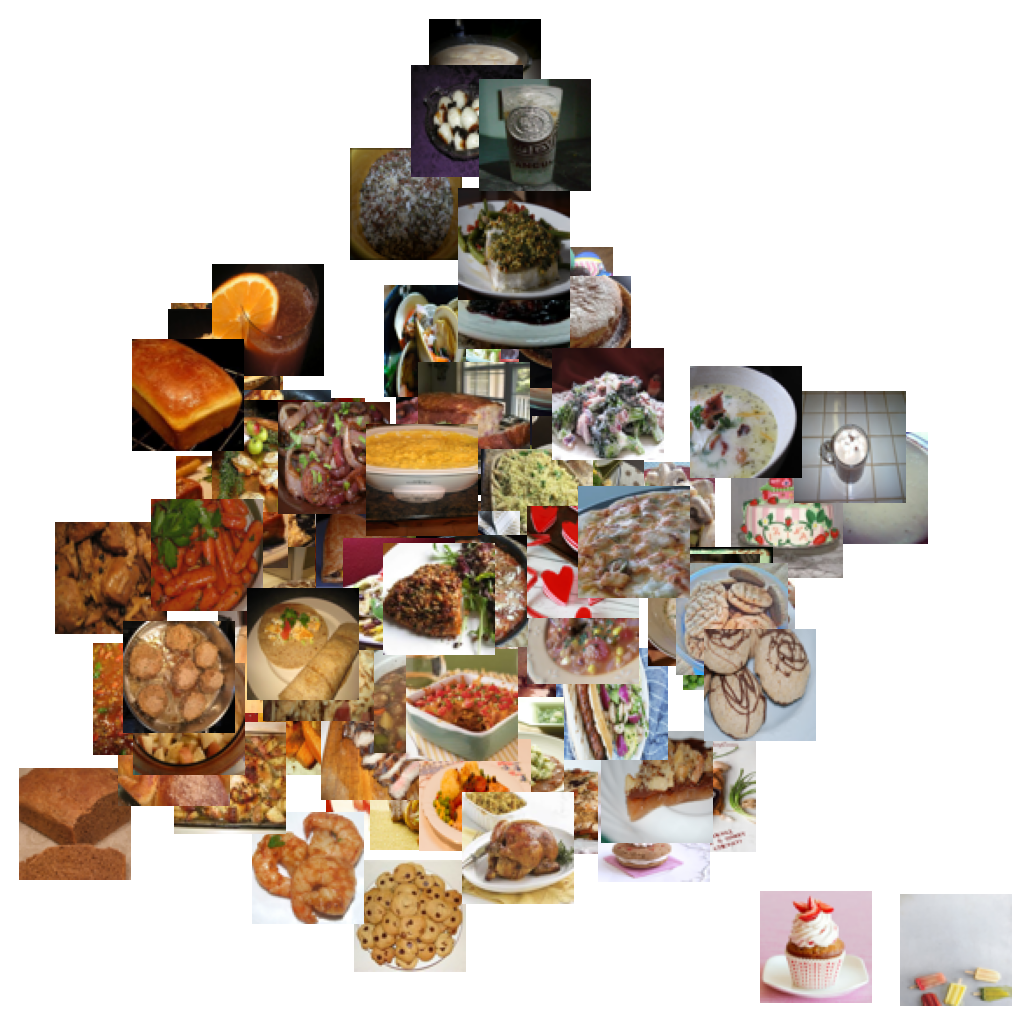

In [26]:
# show the images taking place of the points in the 2D space
def show_xy_images(in_df, image_zoom=1):
    fig, ax1 = plt.subplots(1,1, figsize=(10, 10))
    artists = []
    for _, c_row in in_df.iterrows():
        cx_img = path + '/feature_food/subset/' + c_row['image_path']
        c_img = Image.open(cx_img).resize((64, 64))
        img = OffsetImage(c_img, zoom=image_zoom) 
        ab = AnnotationBbox(img, (c_row['x'], c_row['y']), xycoords='data', frameon=False)
        artists.append(ax1.add_artist(ab))
    ax1.update_datalim(in_df[['x', 'y']])
    ax1.autoscale()
    ax1.axis('off')
show_xy_images(image_subset_df)

In [27]:
%%time
# we use the same function to extract color features for all images
simple_images_df['color_features'] = simple_images_df['image_path'].map(color_count_feature).map(lambda x: x.tolist())
simple_images_df.sample(3)

CPU times: total: 2min 5s
Wall time: 10min 28s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


id      image_path                                      title  \
5823  e41f1b1911  998b7c1189.jpg              Classic Peanut Butter Cookies   
8382  ed4f8c47fb  de68222903.jpg  Peach Pie the Old Fashioned Two Crust Way   
4816  de3a5a557f  802d11859b.jpg               Flan Mexicano (Mexican Flan)   

                                        top_ingredients  \
5823  [unsalted butter, white sugar, brown sugar, eg...   
8382  [egg, lemon juice, all - purpose flour, white ...   
4816  [white sugar, eggs, orange juice, vanilla extr...   

                                         color_features  
5823  [0.0146484375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  
8382  [0.0070343017578125, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4816  [0.00555419921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0....

In [28]:
# save the color features as color features json file
simple_images_df.to_json(path + '/feature_food/color_features.json')